**# PART II**

## Tools & Paths

In [725]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DIR_DATASETS = 'Datasets/'

## Load Data

#### **Features:**
- Historical
    - Gender(GD): 0 = **Male**, 1 = **Female**
    - Age(AG): [33-90]
    - Risk Factors(RF): 0 = **No risk**, 1 = **risk**
- Measurements
    - Systolic Blood Pressure(SBP): [**60 - 221**]
    - Heart Rate (HR): [**40 - 153**]
    - ST elevation (ST): {**0**, **1**}
- Exams
    - Creatinine(CT): [**0.6 - 11.5**]
    - KILLIP class : 1 = **No signs**, 2 = **Mild to moderate sign**, 3 = **Pulmonary edema (Severe)**

In [726]:
HISTORICAL = ['GD','AG','RF']
MEASUREMENTS = ['SBP','HR1','ST','HR2']
EXAMS = ['CT','KL']
TARGET = 'event'
FEATURES_NAMES = HISTORICAL + MEASUREMENTS + EXAMS

data = pd.read_csv(DIR_DATASETS+ 'DATA.txt',sep="   ", header=None, engine='python')
data.columns = FEATURES_NAMES + [TARGET]
N_SAMPLES = data.shape[0]
data.head()

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event
0,1.0,33.0,0.0,132.0,91.579173,1.0,90.0,0.8,1.0,0.0
1,1.0,69.0,0.0,147.0,52.785861,0.0,52.0,1.4,1.0,0.0
2,1.0,63.0,0.0,142.0,40.692798,1.0,44.0,1.1,3.0,1.0
3,0.0,79.0,0.0,147.0,106.420820,1.0,110.0,0.9,1.0,1.0
4,0.0,61.0,0.0,107.0,82.148302,0.0,80.0,1.1,1.0,0.0


In [727]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GD      457 non-null    float64
 1   AG      457 non-null    float64
 2   RF      457 non-null    float64
 3   SBP     457 non-null    float64
 4   HR1     457 non-null    float64
 5   ST      457 non-null    float64
 6   HR2     457 non-null    float64
 7   CT      457 non-null    float64
 8   KL      457 non-null    float64
 9   event   457 non-null    float64
dtypes: float64(10)
memory usage: 35.8 KB


## Data Pre-Processing

In [728]:
data['GD'] = data['GD'].astype(int)
data['RF'] = data['RF'].astype(int)
data['ST'] = data['ST'].astype(int)
data['KL'] = data['KL'].astype(int)
data[TARGET] = data[TARGET].astype(int)
LABELS = np.unique(data[TARGET])
data.head()

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event
0,1,33.0,0,132.0,91.579173,1,90.0,0.8,1,0
1,1,69.0,0,147.0,52.785861,0,52.0,1.4,1,0
2,1,63.0,0,142.0,40.692798,1,44.0,1.1,3,1
3,0,79.0,0,147.0,106.420820,1,110.0,0.9,1,1
4,0,61.0,0,107.0,82.148302,0,80.0,1.1,1,0


In [729]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GD      457 non-null    int64  
 1   AG      457 non-null    float64
 2   RF      457 non-null    int64  
 3   SBP     457 non-null    float64
 4   HR1     457 non-null    float64
 5   ST      457 non-null    int64  
 6   HR2     457 non-null    float64
 7   CT      457 non-null    float64
 8   KL      457 non-null    int64  
 9   event   457 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 35.8 KB


In [730]:
data['RF'].value_counts()

0    387
1     70
Name: RF, dtype: int64

In [731]:
data['KL'].value_counts()

1    393
3     33
2     31
Name: KL, dtype: int64

### Multi-Sensor Data Fusion
<img src="Measurements Fusion.png" width = 500px>

In [732]:
from scipy.stats import norm

STD_HR = np.array([2,0.5])

def fuse_sensor_data(data):
    std1 = np.power(STD_HR[0],2)
    std2 = np.power(STD_HR[1],2)
    data['HR_F'] = (std2/(std1+std2))*data.HR1 +(std1/(std1+std2))*data.HR2
    return data

In [733]:
data = fuse_sensor_data(data)
data.head()

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event,HR_F
0,1,33.0,0,132.0,91.579173,1,90.0,0.8,1,0,90.092893
1,1,69.0,0,147.0,52.785861,0,52.0,1.4,1,0,52.046227
2,1,63.0,0,142.0,40.692798,1,44.0,1.1,3,1,43.805459
3,0,79.0,0,147.0,106.420820,1,110.0,0.9,1,1,109.789460
4,0,61.0,0,107.0,82.148302,0,80.0,1.1,1,0,80.126371


STD Comparison
HR1: 17.1041612429131
HR2: 17.563320835786147
HR Fused: 17.52587534983881
mean Comparison
HR1: 75.77703893654262
HR2: 75.66083150984683
HR Fused: 75.66766724082895


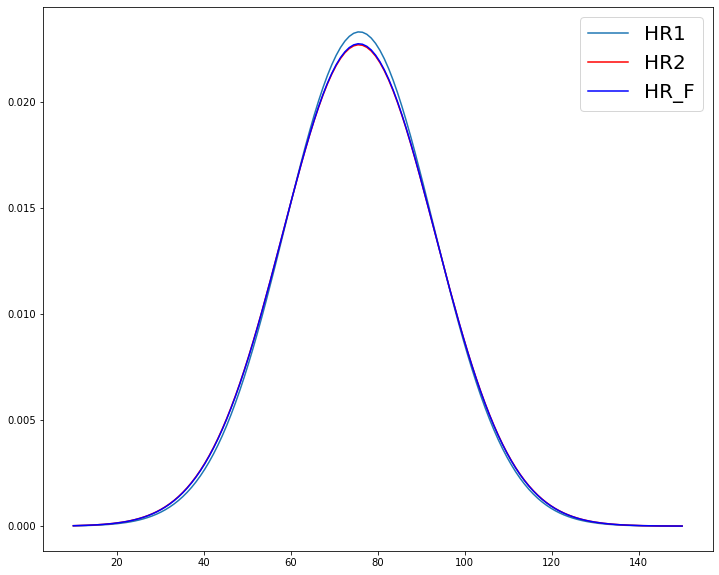

In [734]:
print('STD Comparison')
print('HR1:',data['HR1'].std())
print('HR2:',data['HR2'].std())
print('HR Fused:',data['HR_F'].std())
print('mean Comparison')
print('HR1:',data['HR1'].mean())
print('HR2:',data['HR2'].mean())
print('HR Fused:',data['HR_F'].mean())
plt.figure(figsize=(12,10))
x = np.linspace(10,150, 140)
plt.plot(x,norm.pdf(x,data['HR1'].mean(),data['HR1'].std()),label = 'HR1')
plt.plot(x,norm.pdf(x,data['HR2'].mean(),data['HR2'].std()),'r',label = 'HR2')
plt.plot(x,norm.pdf(x,data['HR_F'].mean(),data['HR_F'].std()),'b',label = 'HR_F')
plt.legend(fontsize =20)
plt.show()

### Clinical Guidelines

In [735]:
cond = ((data.CT >= 1.3) & (data.ST == 1)) | (data.KL>=2)

data['Clinical'] = np.where(cond, 1, 0)
data.head()

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event,HR_F,Clinical
0,1,33.0,0,132.0,91.579173,1,90.0,0.8,1,0,90.092893,0
1,1,69.0,0,147.0,52.785861,0,52.0,1.4,1,0,52.046227,0
2,1,63.0,0,142.0,40.692798,1,44.0,1.1,3,1,43.805459,1
3,0,79.0,0,147.0,106.420820,1,110.0,0.9,1,1,109.789460,0
4,0,61.0,0,107.0,82.148302,0,80.0,1.1,1,0,80.126371,0


## Continuous Variables
* Age
* SBP
* HR Fused (HR1 + HR2)
* CT

### Discrete Variables:
- Gender
- Risk Factors
- Standard Elevation
- KILLIP class
- Clinical 

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

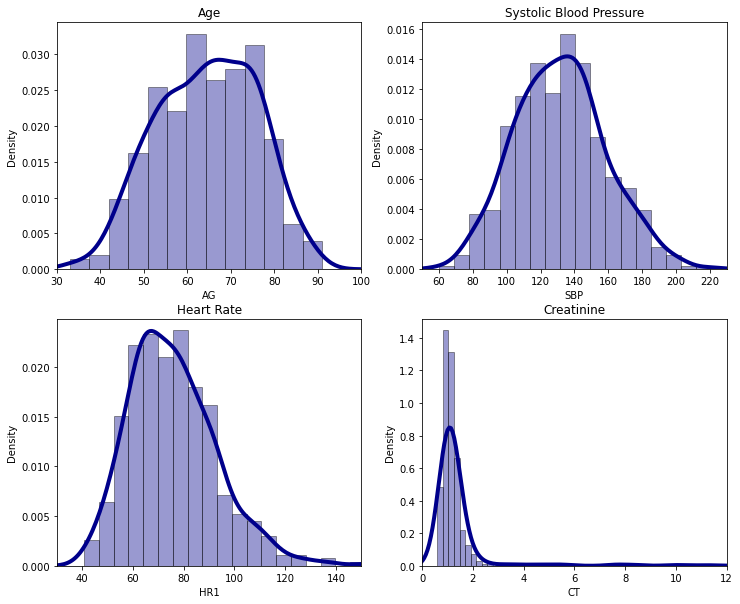

In [736]:
fig,axs = plt.subplots(2,2)
fig.set_size_inches(12, 10)

# x = np.linspace(10,150, 140)


axs[0,0].set_title('Age')
axs[0,0].set_xlim(30,100)
sns.distplot(data.AG, hist=True, kde=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4,},ax =axs[0,0])

axs[0,1].set_title('Systolic Blood Pressure')
axs[0,1].set_xlim(50,230)
sns.distplot(data.SBP, hist=True, kde=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax =axs[0,1])

axs[1,0].set_title('Heart Rate')
axs[1,0].set_xlim(30,150)

sns.distplot(data.HR1, hist=True, kde=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax =axs[1,0])
            
axs[1,1].set_title('Creatinine')
axs[1,1].set_xlim(0,12)
sns.distplot(data.CT, hist=True, kde=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax =axs[1,1])
plt.show()

### Goodness of Fit Tests

The goodness of fit test is used to test if sample data fits a distribution from a certain population (i.e. in this case with a **normal distribution**)

- Chi-Square
    - The chi-square Goodness of fit is to fit one categorical variable to a distribution
- Kolmogorov-Smirnov(KS Test)
    - This test  is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test)
- Shapiro wilk
    - Calculates a W value that will tell you if a random sample came from a normally distributed population. 
    - Recommended for samples up to n=2000.

Reference: https://www.statisticshowto.com/goodness-of-fit-test/

In [737]:
from scipy.stats import ks_1samp, shapiro,chisquare

def goodfitness_tests(data,p_value,columns = ['AG','SBP','HR1','CT']):
    p_values = {}
    for c in columns:
        _, ks = ks_1samp(data[c], norm.cdf)
        _, s = shapiro(data[c])
        _, chs = chisquare(data[c])
        p_values[c] = {
            'ks': ks >= p_value,
            'shapiro': s >= p_value,
            # 'anderson':
            'chi-square': chs>=p_value
        }
    return p_values

Test with following p_values: [0.05, 0.10, 0.15]

In [738]:
gft = pd.DataFrame(goodfitness_tests(data,0.05)).T
gft.to_csv('gdf_p5.csv')
gft

,ks,shapiro,chi-square
AG,False,False,False
SBP,False,True,False
HR1,False,False,False
CT,False,False,False


In [739]:
gft = pd.DataFrame(goodfitness_tests(data,0.1)).T
gft.to_csv('gdf_p10.csv')
gft

,ks,shapiro,chi-square
AG,False,False,False
SBP,False,True,False
HR1,False,False,False
CT,False,False,False


In [740]:
pd.DataFrame(goodfitness_tests(data,0.15)).T
gft.to_csv('gdf_p15.csv')
gft

,ks,shapiro,chi-square
AG,False,False,False
SBP,False,True,False
HR1,False,False,False
CT,False,False,False


After the analysis of the previous statistical tests and the histograms we can see that only the SBP follows a gaussian distribution.

{'AG': array([33.        , 42.66666667, 52.33333333, 62.        , 71.66666667,
        81.33333333, 91.        ]),
 'HR1': array([ 40.692798 ,  62.8337904,  84.9747828, 107.1157752, 129.2567676,
        151.39776  ]),
 'CT': array([ 0.6 ,  6.05, 11.5 ])}

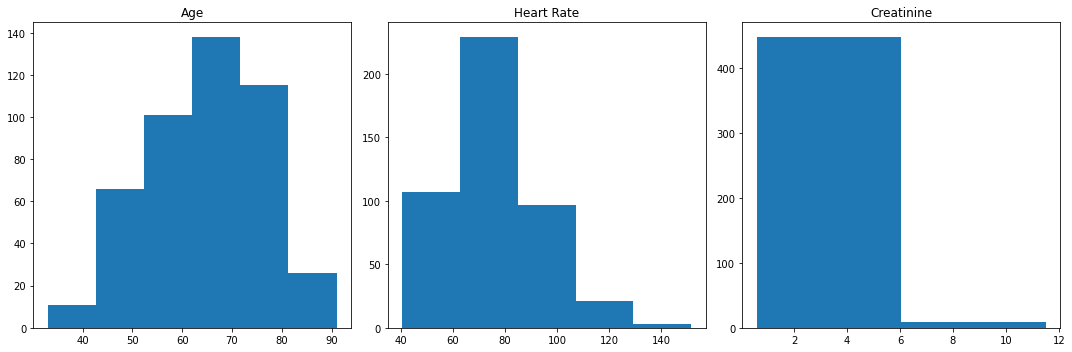

In [741]:
bins = {}
fig,axs = plt.subplots(1,3)
fig.set_size_inches(15, 5)
bins_age = 6
bins_hrf = 5
bins_ct = 2

axs[0].set_title('Age')
bins['AG'] = axs[0].hist(data.AG,bins_age)[1]

axs[1].set_title('Heart Rate')
bins['HR1'] = axs[1].hist(data.HR1,bins_hrf)[1]

axs[2].set_title('Creatinine')
bins['CT'] = axs[2].hist(data.CT,bins_ct)[1]
fig.tight_layout()
bins

In [742]:
def discretize(df, bins, columns=["AG","HR1","CT"]):
    '''
    Discretize continuous variables
    '''

    probs = {} 

    for c in columns:
        probs[c] = np.zeros((2,len(bins[c])-1))
        for i, b in enumerate(bins[c]):
            
            if i == len(bins[c]) - 1:
                break
          
            range = df[(df[c] >= bins[c][i]) & (df[c] < bins[c][i+1])]

            range_no_event = range[range.event == 0].shape[0]
            range_event = range[range.event == 1].shape[0]

            probs[c][:,i] = [range_no_event/(range_no_event + range_event), range_event/(range_no_event + range_event)]

    return probs

def binize(x, bins, columns=["AG","HR1","CT"]):

    bin = {

    }

    for c in columns:
        for i in range(len(bins[c])-1):
            if (x[c] >= bins[c][i]) & (x[c] < bins[c][i+1]):
                bin[c] = i
                break
            elif (i == (len(bins[c])-2)):
                bin[c] = i

    return bin


In [743]:
discretized_probs = discretize(data, bins)
discretized_probs

{'AG': array([[1.        , 0.93939394, 0.8019802 , 0.58695652, 0.33913043,
         0.16      ],
        [0.        , 0.06060606, 0.1980198 , 0.41304348, 0.66086957,
         0.84      ]]),
 'HR1': array([[0.58878505, 0.66812227, 0.57731959, 0.28571429, 0.        ],
        [0.41121495, 0.33187773, 0.42268041, 0.71428571, 1.        ]]),
 'CT': array([[0.61607143, 0.25      ],
        [0.38392857, 0.75      ]])}

## Bayes Theorem
<img src="Bayes_continuous.png" width = 400px>

In [744]:
DISCRETIZED_COLS = ['AG','HR1','CT']
DISCRETE_COLS = ['RF','ST','KL','Clinical']
CONTINUOUS_COLS = ['SBP','AG','HR1','CT']

### **Likelihood (Discrete)**
<img src="Likelihood_discrete.png" width = 400px>

In [745]:
def likelihood_discrete(data,x,label,n,columns = DISCRETE_COLS,discretized_cols = DISCRETIZED_COLS):
    probs= []
    for c in columns:
        cond = (data[TARGET] == label) & (data[c] == x[c])
        data_l = data[cond]
        probs.append(data_l[c].shape[0]/n)
    bins_x = binize(x,bins)

    for c in discretized_cols:
        probs.append(discretized_probs[c][label,bins_x[c]])
    return np.prod(probs)

In [746]:
labels_size = data[TARGET].value_counts()
probs_target = []
discrete_vals = np.zeros((N_SAMPLES,len(labels_size)))
discrete_guess = np.zeros(N_SAMPLES)

for s in labels_size:
    probs_target.append(s/N_SAMPLES)

print('Value counts',labels_size)
print('Probabilility of labels respectevely:\n',probs_target)

for row in range(N_SAMPLES):
    for l,size in enumerate(labels_size):
        discrete_vals[row][l] = likelihood_discrete(data,data.iloc[row],l,size) * probs_target[l]
    index = np.argmax(discrete_vals[row])
    discrete_guess[row] = index

data['Discrete_guess'] = discrete_guess.astype(int)
data.head()

Value counts 0    278
1    179
Name: event, dtype: int64
Probabilility of labels respectevely:
 [0.6083150984682714, 0.3916849015317287]


,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event,HR_F,Clinical,Discrete_guess
0,1,33.0,0,132.0,91.579173,1,90.0,0.8,1,0,90.092893,0,0
1,1,69.0,0,147.0,52.785861,0,52.0,1.4,1,0,52.046227,0,0
2,1,63.0,0,142.0,40.692798,1,44.0,1.1,3,1,43.805459,1,1
3,0,79.0,0,147.0,106.420820,1,110.0,0.9,1,1,109.789460,0,0
4,0,61.0,0,107.0,82.148302,0,80.0,1.1,1,0,80.126371,0,0


In [747]:
data.head()

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event,HR_F,Clinical,Discrete_guess
0,1,33.0,0,132.0,91.579173,1,90.0,0.8,1,0,90.092893,0,0
1,1,69.0,0,147.0,52.785861,0,52.0,1.4,1,0,52.046227,0,0
2,1,63.0,0,142.0,40.692798,1,44.0,1.1,3,1,43.805459,1,1
3,0,79.0,0,147.0,106.420820,1,110.0,0.9,1,1,109.789460,0,0
4,0,61.0,0,107.0,82.148302,0,80.0,1.1,1,0,80.126371,0,0


#### **Likelihood (Continuous)**
<img src="Likelihood_continuous.png" width = 400px>

In [748]:
# def calc_mean_std(data,labels,columns = CONTINUOUS_COLS):
#     n_cols = len(columns)
#     n_labels = len(labels)
#     mean_feats = np.zeros((n_cols,n_labels))
#     std_feats = np.zeros((n_cols,n_labels))
    
#     for i,l in enumerate(labels):
#         for k,col in enumerate(columns):
#             data_col = data[data[TARGET] == l]
#             mean_feats[k][i] = data_col[col].mean()
#             std_feats[k][i] = data_col[col].std()
#     return mean_feats,std_feats
    
# def likelihood_continuous(data,probs_target,mean,std,columns = CONTINUOUS_COLS):
#     probs_continuous = []

#     for i,l in enumerate(probs_target):
#         probs = [l]
#         for k,col in enumerate(columns):
#             # calc = ( 1 / (std[k][i] * np.sqrt(2*np.pi))) * np.exp(-((data[col] - mean[k][i]) / (2 * (np.power(std[k][i],2))) ))            
#             probs.append(norm.pdf(data[col],mean[k][i], std[k][i]))
#         probs_continuous.append(float(np.prod(probs)))
#     return probs_continuous
def means_stds(df, columns, target):
    means_std = {}

    mean_0 = []
    std_0 = []
    mean_1 = []
    std_1 = []
    
    for i in columns:
        mean_0.append(df[df[target] == 0][i].mean())
        mean_1.append(df[df[target] == 1][i].mean())

        std_0.append(df[df[target] == 0][i].std())
        std_1.append(df[df[target] == 1][i].std())

    means_std["mean_no_event"] = mean_0
    means_std["mean_event"] = mean_1

    means_std["std_no_event"] = std_0
    means_std["std_event"] = std_1
    
    return means_std


# Returns the probability distribution function value given mean, std and x value
def normpdf(x, mean, std):
    return norm.pdf(x, mean, std)


# Makes the fusion of the continuous data
def continuous_data(x, mean, std):
    aux = []
    for i in range(len(x)):
        aux.append(normpdf(x[i], mean[i], std[i]))
        
    return np.prod(aux)
def bayes_continuous(row, df,columns = CONTINUOUS_COLS):
    row = row[columns]

    result = 1
    for name, value in row.items():
        mean = df[name].mean()
        std = df[name].std()
        prob = norm.pdf(value, mean, std)
        result *= prob

    return result

In [749]:
sbp_labels = np.unique(data['SBP'])

labels = np.unique(data[TARGET])
continuous_vals = np.zeros((N_SAMPLES,len(probs_target)))
continuous_guess = np.zeros(N_SAMPLES)
# feats_mean, feats_std = calc_mean_std(data,labels,columns=['SBP'])
mean_std = means_stds(data, CONTINUOUS_COLS, TARGET)
# data_event = data[data[TARGET] == 1]
# data_no_event = data[data[TARGET] == 0]
for i in range(N_SAMPLES):
    x = np.array([data.loc[i]["SBP"]])
    # probs = likelihood_continuous(data.iloc[i],probs_target,feats_mean,feats_std,columns = ['SBP'])
    continuous_vals[i][0] = continuous_data(x, mean_std["mean_no_event"], mean_std["std_no_event"])
    continuous_vals[i][1] = continuous_data(x, mean_std["mean_event"], mean_std["std_event"])

    index = np.argmax(continuous_vals[i])
    continuous_guess[i] = index

data['Continuous_guess'] = continuous_guess.astype(int)
data.head()


[132.]
1
[132.]
1
[147.]
1
[147.]
1
[142.]
1
[142.]
1
[147.]
1
[147.]
1
[107.]
1
[107.]
1
[89.]
1
[89.]
1
[103.]
1
[103.]
1
[100.]
1
[100.]
1
[135.]
1
[135.]
1
[112.]
1
[112.]
1
[142.]
1
[142.]
1
[102.]
1
[102.]
1
[122.]
1
[122.]
1
[122.]
1
[122.]
1
[150.]
1
[150.]
1
[113.]
1
[113.]
1
[138.]
1
[138.]
1
[82.]
1
[82.]
1
[114.]
1
[114.]
1
[130.]
1
[130.]
1
[144.]
1
[144.]
1
[140.]
1
[140.]
1
[132.]
1
[132.]
1
[108.]
1
[108.]
1
[138.]
1
[138.]
1
[137.]
1
[137.]
1
[82.]
1
[82.]
1
[180.]
1
[180.]
1
[118.]
1
[118.]
1
[140.]
1
[140.]
1
[132.]
1
[132.]
1
[152.]
1
[152.]
1
[77.]
1
[77.]
1
[114.]
1
[114.]
1
[160.]
1
[160.]
1
[170.]
1
[170.]
1
[140.]
1
[140.]
1
[139.]
1
[139.]
1
[150.]
1
[150.]
1
[151.]
1
[151.]
1
[136.]
1
[136.]
1
[140.]
1
[140.]
1
[153.]
1
[153.]
1
[126.]
1
[126.]
1
[117.]
1
[117.]
1
[130.]
1
[130.]
1
[129.]
1
[129.]
1
[162.]
1
[162.]
1
[125.]
1
[125.]
1
[78.]
1
[78.]
1
[128.]
1
[128.]
1
[165.]
1
[165.]
1
[144.]
1
[144.]
1
[118.]
1
[118.]
1
[129.]
1
[129.]
1
[152.]
1
[152.]
1
[1

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event,HR_F,Clinical,Discrete_guess,Continuous_guess
0,1,33.0,0,132.0,91.579173,1,90.0,0.8,1,0,90.092893,0,0,0
1,1,69.0,0,147.0,52.785861,0,52.0,1.4,1,0,52.046227,0,0,1
2,1,63.0,0,142.0,40.692798,1,44.0,1.1,3,1,43.805459,1,1,1
3,0,79.0,0,147.0,106.420820,1,110.0,0.9,1,1,109.789460,0,0,1
4,0,61.0,0,107.0,82.148302,0,80.0,1.1,1,0,80.126371,0,0,0


In [750]:
decision = continuous_vals * discrete_vals
data['decision'] = (decision[:,1] > decision[:, 0]).astype(int)
data.head()

,GD,AG,RF,SBP,HR1,ST,HR2,CT,KL,event,HR_F,Clinical,Discrete_guess,Continuous_guess,decision
0,1,33.0,0,132.0,91.579173,1,90.0,0.8,1,0,90.092893,0,0,0,0
1,1,69.0,0,147.0,52.785861,0,52.0,1.4,1,0,52.046227,0,0,1,0
2,1,63.0,0,142.0,40.692798,1,44.0,1.1,3,1,43.805459,1,1,1,1
3,0,79.0,0,147.0,106.420820,1,110.0,0.9,1,1,109.789460,0,0,1,0
4,0,61.0,0,107.0,82.148302,0,80.0,1.1,1,0,80.126371,0,0,0,0


## Evaluation
- ### Sensitivity:
    - Concerned with identifying positive outcomes and the **cost of a false positive is low**
    - Example: whether a patient has cancer or not, it is important that the sensitivity be incredibly high so that we can capture as many positive cases as possible, even if it means we pull in a few patients who don’t actually have cancer
    
- ### Specificity:
    - Ratio of true negatives to all negative outcomes
    - Concerned about the accuracy of your negative rate and there is a **high cost to a positive outcome**
    - Example: if you’re an auditor looking over financial transactions and a positive outcome would mean a one year investigation, but not finding one would only cost the company $50
- ### Geo_mean:
    - Mean or average, which indicates the **central tendency** or typical value of a set of numbers by using the product of their values (as opposed to the arithmetic mean which uses their sum)

In [751]:
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score

def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod() ** (1.0 / len(a))

def sensitivity(tp, fn):
    return tp/(tp+fn)

def specificity(fp, tn):
    return tn/(fp+tn)
def accuracy(real,pred):
    return accuracy_score(real,pred)

def eval(pred):
    tn, fp, fn, tp = confusion_matrix(data.event, pred).ravel()
    sensitivity_val = sensitivity(tp, fn)
    specificity_val = specificity(fp, tn)
    gm = geo_mean([specificity_val,sensitivity_val])
    
    return [sensitivity_val,specificity_val,gm,f1_score(data.event, pred),accuracy(data.event,pred)]


In [752]:
eval_discrete = eval(data['Discrete_guess'])
eval_continous = eval(data['Continuous_guess'])
eval_decision = eval(data['decision'])
metrics = ['SE','SP','GM','F1-SCORE','Accuracy']
pred_df = pd.DataFrame(data = [eval_discrete,eval_continous,eval_decision],index = ['Discrete','Continous','Combination'],columns = metrics)

pred_df.to_csv('evaluation.csv')
pred_df

,SE,SP,GM,F1-SCORE,Accuracy
Discrete,0.558659,0.946043,0.726991,0.680272,0.794311
Continous,0.608939,0.643885,0.626168,0.563307,0.630197
Combination,0.569832,0.942446,0.732828,0.686869,0.796499
